In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import numpy as np

In [3]:
from collections import defaultdict

def get_fields(filename, a, b):
    data = json.load(open(filename))
    avs = defaultdict(list)
    bvs = defaultdict(list)
    cvs = defaultdict(list)

    for d in data['benchmarks']:
        name = d['name'].split('[')[0].replace('test_', '')
        #name += '-%s' % d['params']['seed']
        avs[name] += [d['params'][a]]
        bvs[name] += [d['params'][b]]
        cvs[name] += [d['stats']['median']]

    avs = dict(avs)
    bvs = dict(bvs)
    cvs = dict(cvs)
    for name in avs.keys():
        avs[name] = np.array(avs[name])
        bvs[name] = np.array(bvs[name])
        cvs[name] = np.array(cvs[name])
        
    return avs, bvs, cvs

def get_dense(filename):
    return get_fields(filename, 'sz', 'rng')

def get_sparse(filename):
    return get_fields(filename, 'sz', 'sparsity')

def get_nnz(filename):
    return get_fields(filename, 'sz', 'nnz')

## Dense

In [4]:
szs, rngs, values = get_dense('matrix_dense_hard.json')

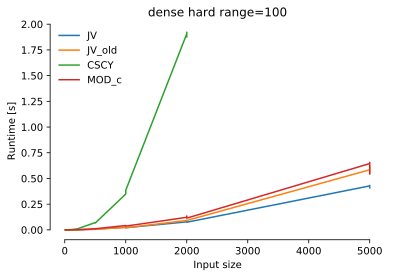

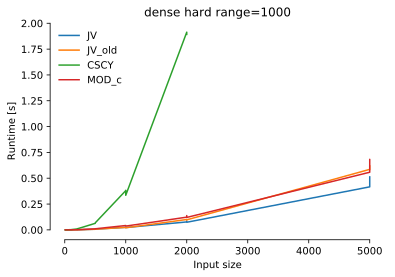

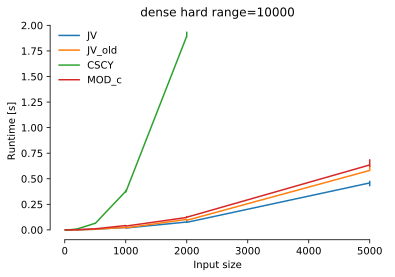

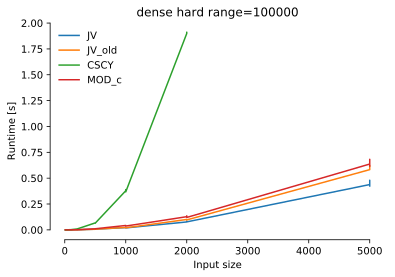

In [5]:
for rng in [100, 1000, 10000, 100000]:
    figure()
    title('dense hard range=%d' % rng)
    for name in szs.keys():
        select = rngs[name] == rng
        plot(szs[name][select], values[name][select], label=name)
    ylabel('Runtime [s]')
    xlabel('Input size')
    ax = gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_bounds(*tuple(yticks()[0][[1, -2]]))
    ax.spines['bottom'].set_bounds(*tuple(xticks()[0][[1, -2]]))
    legend(frameon=False, ncol=1, loc='upper left')

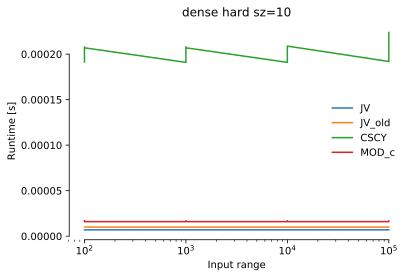

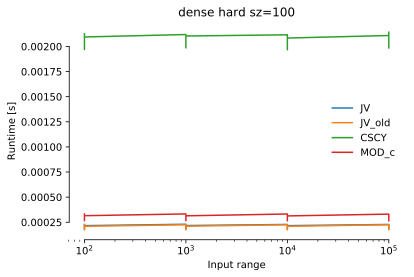

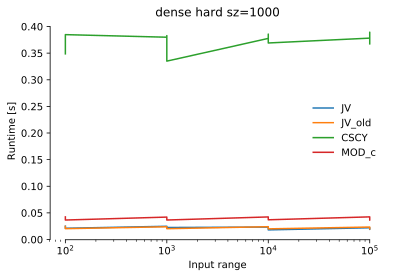

In [6]:
for sz in [10, 100, 1000]:
    figure()
    title('dense hard sz=%d' % sz)
    for name in szs.keys():
        select = szs[name] == sz
        plot(rngs[name][select], values[name][select], label=name)
    ylabel('Runtime [s]')
    xlabel('Input range')
    xscale('log')
    ax = gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_bounds(*tuple(yticks()[0][[1, -2]]))
    ax.spines['bottom'].set_bounds(100, 100000)
    legend(frameon=False, ncol=1, loc='center right')

## Sparse

In [7]:
szs, sparsities, values = get_sparse('matrix_sparse.json')

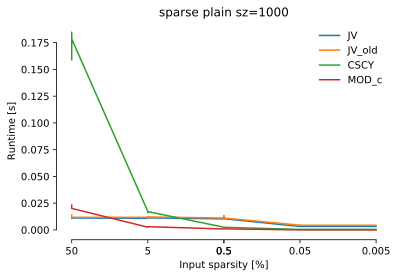

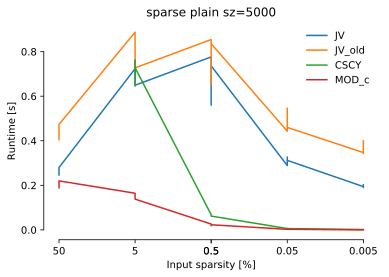

In [8]:
display = [0.5, 0.05, 0.005, 0.005, 0.0005, 0.00005]
for sz in [1000, 5000]:
    figure()
    title('sparse plain sz=%d' % sz)
    for name in szs.keys():
        select = szs[name] == sz
        plot(-log10(sparsities[name][select]), values[name][select], label=name)
    ylabel('Runtime [s]')
    xlabel('Input sparsity [%]')
#    continue
    ax = gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_bounds(*tuple(yticks()[0][[1, -2]]))
    ax.spines['bottom'].set_bounds(-log10(display[0]), -log10(display[-1]))
    ax.xaxis.set_ticks([-log10(_) for _ in display])
    ax.xaxis.set_ticklabels(['%g' % (100*_) for _ in display])
    legend(frameon=False, ncol=1, loc='upper right')

In [9]:
szs, nnzs, values = get_nnz('matrix_nnz.json')

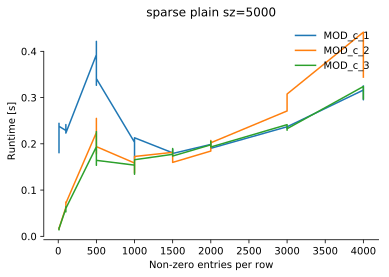

In [10]:
sz = 5000
figure()
title('sparse plain sz=%d' % sz)
for name in szs.keys():
    select = szs[name] == sz
    plot(nnzs[name][select], values[name][select], label=name)
ylabel('Runtime [s]')
xlabel('Non-zero entries per row')
ax = gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(*tuple(yticks()[0][[1, -2]]))
#ax.spines['bottom'].set_bounds(-log10(display[0]), -log10(display[-1]))
#ax.xaxis.set_ticks([-log10(_) for _ in display])
#ax.xaxis.set_ticklabels(['%g' % (100*_) for _ in display])
legend(frameon=False, ncol=1, loc='upper right')